In [1]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))
display(HTML("<style>.container {width:100% !important; }</style>"))

# check environment
import os
print(f'Conda Environment: ' + os.environ['CONDA_DEFAULT_ENV'])

Conda Environment: roicat


In [2]:
from pathlib import Path

import matplotlib.pyplot as plt

import numpy as np

In [4]:
%load_ext autoreload
%autoreload 2
import bnpm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


import a single s2p output directory to test parameters on

In [5]:
dir_s2p = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0403R/tmp_suite2p/20230706/scanimage_data/exp/jobNum_0/suite2p/plane0'

In [6]:
F, Fneu, iscell, ops, spks, stat = bnpm.ca2p_preprocessing.import_s2p(dir_s2p)

In [7]:
Fs = ops['fs']

In [8]:
dFoF_params = {
    "channelOffset_correction": 0,
    "percentile_baseline": 30,
    "neuropil_fraction": 0.7,
    "rolling_percentile_window": 30*15*60,
}

In [9]:
dFoF , dF , F_neuSub , F_baseline_roll = bnpm.ca2p_preprocessing.make_dFoF(
    F,
    Fneu=Fneu,
    roll_centered=True,
    roll_stride=1,
    roll_interpolation='linear',
    multicore_pref=True,
    verbose=True,
    **dFoF_params,
)

100%|███████████████████████████████████████████████████████████████████████████| 36/36 [00:22<00:00,  1.61it/s]


Calculated dFoF. Total elapsed time: 26.19 seconds


In [86]:
thresh = {
    'var_ratio__Fneu_over_F': (0, 0.6),
    'EV__F_by_Fneu': (0, 0.6),
    'base_FneuSub': (0, 2000),
    'base_F': (0, 5000),
    'nsr_autoregressive': (0, 20),
    'noise_derivMAD': (0, 0.075),
    'max_dFoF': (0.75, 40),
    'baseline_var': (0, 0.075),
}

ROIs excluded: 727 / 1798
ROIs included: 1071 / 1798


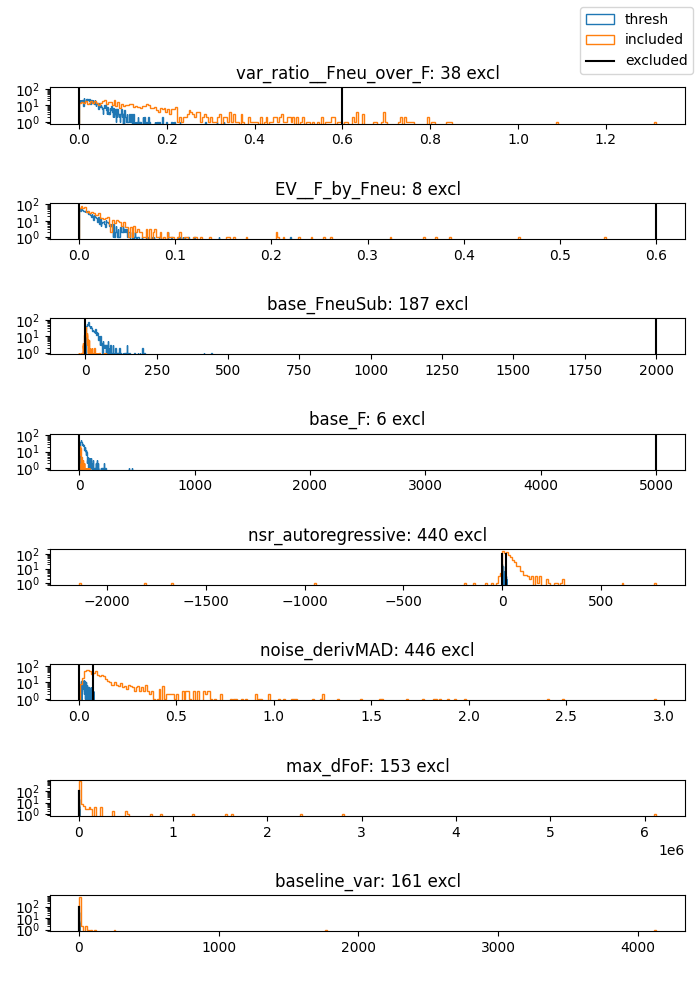

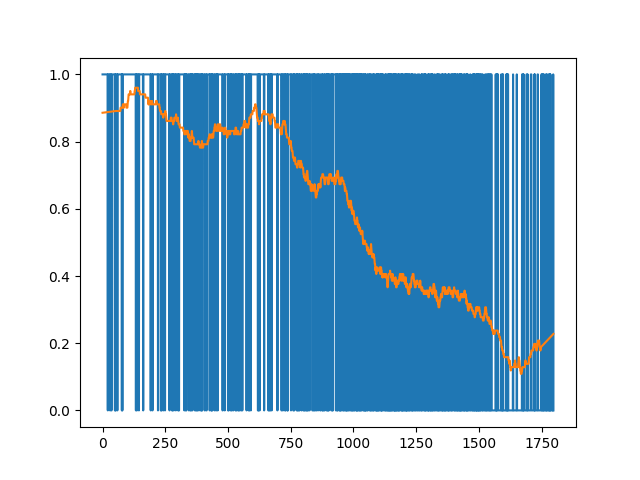

In [87]:
%matplotlib widget

tqm, iscell_tqm = bnpm.ca2p_preprocessing.trace_quality_metrics(
    F=F,
    Fneu=Fneu,
    dFoF=dFoF,
    F_neuSub=F_neuSub,
    F_baseline_roll=F_baseline_roll,
    percentile_baseline=dFoF_params['percentile_baseline'],
    Fs=Fs,
    plot_pref=True,
    thresh=thresh,
    device='cpu',
)

(0.0, 200.0)

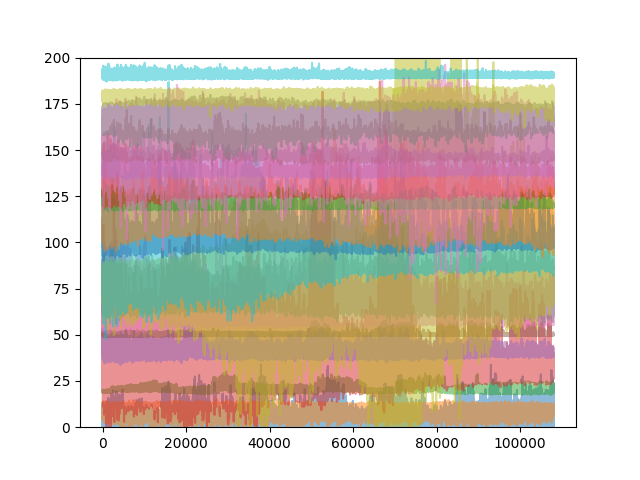

In [80]:
n = 20

plt.figure()
plt.plot(dFoF[~iscell_tqm][:n].T + np.arange(n)[None,:]*10, alpha=0.5);
plt.ylim([0, n * 10])

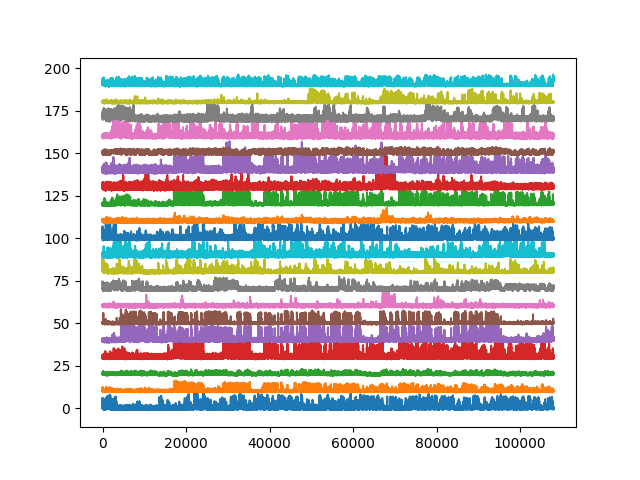

In [81]:
n = 20

plt.figure()
plt.plot(dFoF[iscell_tqm][:n].T + np.arange(n)[None,:]*10);